# Logistic Regression Exercises

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")


In [128]:
import os

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [130]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
from env import host, user, password

In [132]:
def get_db(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [133]:
sql_query = 'SELECT * FROM passengers'

In [134]:
get_titanic_data = pd.read_sql(sql_query, get_db('titanic_db'))
get_titanic_data

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [10]:
def get_titanic_data_cache():
    filename = 'titanic.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        titanic_df = pd.read_sql('SELECT * FROM passengers', get_db('titanic_db'))
        titanic_df.to_csv(filename, index = False)
        # Ryan was using .to_file, but I was getting error when trying to use that function.
        return titanic_df

In [11]:
df = get_titanic_data_cache()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [21]:
from aquire import get_titanic_data_cache

In [22]:
from prepare import prep_titanic_data

In [25]:
aquire.get_titantic_data_cache

NameError: name 'aquire' is not defined

In [15]:
prep_titanic_data(get_titanic_data_cache)

NameError: name 'prep_titanic_data' is not defined

In [28]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [27]:
# I'll need to work on my prep function because it isn't working currently.


def prep_titanic_data(titanic_data):
    # Importing the libraries I'll need for this function.
    from sklearn.impute import SimpleImputer
    import warnings
    warnings.filterwarnings("ignore")
    
    # Handling the missing data
    titanic_data = titanic_data[~titanic_data.embark_town.isnull()]
    # Removing the 'deck' column    
    titanic_data = titanic_data.drop(columns = 'deck')
    # Creating dummy variables
    dummy_titanic_df = pd.get_dummies(titanic_data['embarked'], dummy_na = False)
    titanic_data = pd.concat([titanic_data, dummy_titanic_df], axis=1)
    
    # Using the impute method to fill the missing values in the age column
    imputer = SimpleImputer(strategy = 'most_frequent')
    imputer.fit(titanic_data[['age']])
    titanic_data[['age']] = imputer.transform(titanic_data[['age']])
    return titanic_data

In [30]:
prep_titanic_data(df)
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [31]:
df = df[~df.embark_town.isnull()]
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [32]:
df = df.drop(columns = 'deck')
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1


In [33]:
dummy_df = pd.get_dummies(df['embarked'], dummy_na = False)
df = pd.concat([df, dummy_df], axis=1)

In [34]:
df.drop(columns = 'passenger_id', inplace = True)

In [35]:
df.drop(columns = 'embarked', inplace = True)
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1
888,0,3,female,NaN,1,2,23.4500,Third,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0


In [36]:
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(df[['age']])
df[['age']] = imputer.transform(df[['age']])
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0


In [37]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0


In [38]:
# Had to manually do it, but the dataframe should be prepped now...

### 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [71]:
# I'm not sure which model they were referring to as the original model.

In [39]:
# Summarize:

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   class        889 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        889 non-null    int64  
 10  C            889 non-null    uint8  
 11  Q            889 non-null    uint8  
 12  S            889 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 79.0+ KB


In [41]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,alone,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,28.518751,0.524184,0.382452,32.096681,0.601800,0.188976,0.086614,0.724409
std,0.486260,0.834700,13.162820,1.103705,0.806761,49.697504,0.489803,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [124]:
df.shape

(889, 13)

In [96]:
print(df.sex.value_counts())
print(df.pclass.value_counts())
print(df.survived.value_counts())

male      577
female    312
Name: sex, dtype: int64
3    491
1    214
2    184
Name: pclass, dtype: int64
0    549
1    340
Name: survived, dtype: int64


(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

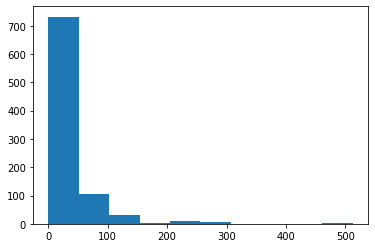

In [97]:
plt.hist(df.fare)

(array([ 54.,  46., 354., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

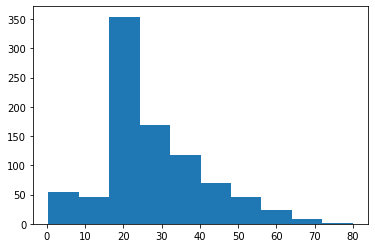

In [98]:
plt.hist(df.age)

(array([214.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

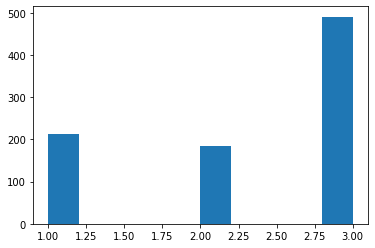

In [99]:
plt.hist(df.pclass)

In [187]:
# Splitting the datasets:

train_validate, test = train_test_split(df, test_size = .2, random_state = 123, stratify = df.survived)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123, stratify = train_validate.survived)

In [188]:
train

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
583,0,1,male,36.0,0,0,40.1250,First,Cherbourg,1,1,0,0
337,1,1,female,41.0,0,0,134.5000,First,Cherbourg,1,1,0,0
50,0,3,male,7.0,4,1,39.6875,Third,Southampton,0,0,0,1
218,1,1,female,32.0,0,0,76.2917,First,Cherbourg,1,1,0,0
31,1,1,female,24.0,1,0,146.5208,First,Cherbourg,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0,3,male,28.0,0,0,7.8958,Third,Southampton,1,0,0,1
636,0,3,male,32.0,0,0,7.9250,Third,Southampton,1,0,0,1
222,0,3,male,51.0,0,0,8.0500,Third,Southampton,1,0,0,1
485,0,3,female,24.0,3,1,25.4667,Third,Southampton,0,0,0,1


In [42]:
len(df[df.survived == 1]) / df.shape[0]

0.38245219347581555

### 1. Start by defining your baseline model.

The baseline generally is a model that picks the most commonly occuring class every time. In this case there were fewer survivors than those that died, but I want to focus on those that survived, so my baseline model will be finding the accuracy of a model that predicts everyone survived.
- In this case since it's a binomial outcome, finding the baseline will be anagulous with finding the survival rate.

In [265]:
#Baseline model:

survive_baseline = (train.survived == 0).mean()
print(f' surival baseline: {survive_baseline}')

# Another way to put it:

train.survived.value_counts(normalize = True)[0]

# My baseline is the most commonly occuring result, which is, 61% of the people did not survive. So I need a model that more accuractely predicts the outcome.

 surival baseline: 0.6177062374245473


0.6177062374245473

In [353]:
# So I need to create a model that is accurate > 61% of the time.

In [191]:
# Create the logistic regression object:

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [267]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0


In [268]:
df.dropna(inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0


In [45]:
X = df[['pclass','age','fare']]
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (497, 3) , validate:  (214, 3) , test:  (178, 3)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [125]:
type(X_train)

pandas.core.frame.DataFrame

In [124]:
X_train

,pclass,age,fare,sibsp
689,1,15.0,211.3375,0
191,2,19.0,13.0000,0
634,3,9.0,27.9000,3
623,3,21.0,7.8542,0
244,3,30.0,7.2250,0
...,...,...,...,...
459,3,24.0,7.7500,0
778,3,24.0,7.7375,0
841,2,16.0,10.5000,0
515,1,47.0,34.0208,0


In [47]:
# Baseline:

1 - y.mean()

# If the model assumed everyone dies on the trip, it would be right 61% of the time.

survived    0.617548
dtype: float64

In [48]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [49]:
logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs')

# class_weight={0:1, 1:99}, So the key is the class_weight... Still don't fully understand how that works.

In [50]:
logit

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
logit = logit.fit(X_train, y_train)
logit

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 2nd Attempt at question 2

- Tried doing it following the directions in the curriculum exactly, without worrying about the class_weight or any other hyperparameter.

In [58]:
logit.fit

<bound method LogisticRegression.fit of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [59]:
# Dataframe already prepared...

df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0


In [63]:
# Training the model:

x = df[['pclass','age','fare']]
y = df[['survived']]

x_train_validate, x_test, y_train_validate, y_test = train_test_split(x, y, test_size = .20, random_state = 123)

x_train, x_validate, y_train, y_validate = train_test_split(x_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", x_train.shape, ", validate: ", x_validate.shape, ", test: ", x_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (497, 3) , validate:  (214, 3) , test:  (178, 3)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [64]:
x_train.age.describe()

count    497.000000
mean      28.116700
std       13.130475
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [65]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(x_train)
x_train = imp_mean.transform(x_train)

In [66]:
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(x_validate)
x_validate = imp_mean.transform(x_validate)

In [67]:
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(x_test)
x_test = imp_mean.transform(x_test)

In [68]:
logit1 = LogisticRegression(C=1, random_state = 123, solver='saga')
logit1.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Print coefficents and intercepts
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[-0.05153572 -0.02876387  0.01488838]]
Intercept: 
 [-0.00702545]


In [70]:
# make a prediction with traning data
y_pred = logit1.predict(x_train)
# estimate prob of survival with training data
y_pred_proba = logit1.predict_proba(x_train)

In [71]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(x_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.68


In [72]:
# Accuracy

logit1.score(x_train, y_train)

0.6780684104627767

In [73]:
# Confusion Matrix

print(confusion_matrix(y_train, y_pred))

[[283  30]
 [130  54]]


In [74]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       313
           1       0.64      0.29      0.40       184

    accuracy                           0.68       497
   macro avg       0.66      0.60      0.59       497
weighted avg       0.67      0.68      0.64       497



In [75]:
# The accuracy of Model 1 at 72% accuracy is better than the baseline at 61% accuracy. 

# Question for instructors = What is this % accuracy actuall? Am I calculating the % of survival, or the % of not surviving? Am I testing the accuracy of the True Positive (did not survive) or True Negative (did survive)?

### 3. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [76]:
# Again, comparing against the baseline AND Model 1 prepared above.

In [77]:
# Starting with base dataframe:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1


In [78]:
# Dummary variable for sex:

dummy_df = pd.get_dummies(df['sex'], dummy_na=False, drop_first=[True])

# append dummy df cols to the original df. 
df = pd.concat([df, dummy_df], axis=1)
df = df.rename(columns = {'male': 'sex_type'})

df

# So I dropped the first column which would've been female(0 or 1), since if the male column shows a 0, that means male == False, ie Female == True.
# Probably should've named this column something else.

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S,sex_type
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1,0
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1,0
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0,1


In [79]:
X = df[['pclass','age','fare', 'sex_type']]
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (497, 4) , validate:  (214, 4) , test:  (178, 4)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [80]:
# I'm not sure it's necessary to do this, since I don't think there are any empty ages in 

from sklearn.impute import SimpleImputer
impute_strat = SimpleImputer(strategy = 'most_frequent')

X_train[['age']] = imputer.fit_transform(X_train[['age']])
X_validate[['age']] = imputer.transform(X_validate[['age']])
X_test[['age']] = imputer.transform(X_test[['age']])


In [81]:
logit_2 = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
logit_2.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# Print coefficents and intercepts
print('Coefficient: \n', logit_2.coef_)
print('Intercept: \n', logit_2.intercept_)

Coefficient: 
 [[-1.08363353e+00 -3.16663020e-02  1.73245998e-03 -2.16797714e+00]]
Intercept: 
 [4.0654252]


In [83]:
# make a prediction with traning data
y_pred_2 = logit_2.predict(X_train)
# estimate prob of survival with training data
y_pred_proba_2 = logit_2.predict_proba(X_train)

In [84]:
y_pred_2.mean()

0.3561368209255533

In [85]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.77


In [86]:
# Confusion matrix
print(confusion_matrix(y_train, y_pred_2))

[[260  53]
 [ 60 124]]


In [87]:
# classification report
print(classification_report(y_train, y_pred_2))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       313
           1       0.70      0.67      0.69       184

    accuracy                           0.77       497
   macro avg       0.76      0.75      0.75       497
weighted avg       0.77      0.77      0.77       497



In [88]:
# Accuracy was slightly higher, at 77%, thus Model 2 is a better model than the baseline and model 1

### 4. Try out other combinations of features and models.

In [89]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S,sex_type
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1,0
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1,0
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0,1


In [111]:
# Model 3 Training

In [90]:
X = df[['pclass','age','fare', 'alone']]
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (497, 4) , validate:  (214, 4) , test:  (178, 4)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [91]:
logit_3 = LogisticRegression()
logit_3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
# Print coefficents and intercepts
print('Coefficient: \n', logit_3.coef_)
print('Intercept: \n', logit_3.intercept_)

Coefficient: 
 [[-0.94313824 -0.03079464  0.00266789 -0.65766776]]
Intercept: 
 [2.76981765]


In [93]:
# make a prediction with traning data
y_pred_3 = logit_3.predict(X_train)
# estimate prob of survival with training data
y_pred_proba_3 = logit_3.predict_proba(X_train)

In [94]:
y_pred_3.mean()

0.2595573440643863

In [95]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}\n'
     .format(logit_3.score(X_train, y_train)))

# Confusion matrix
print(confusion_matrix(y_train, y_pred_3))

# classification report
print(classification_report(y_train, y_pred_3))

Accuracy of Logistic Regression classifier on training set: 0.73

[[273  40]
 [ 95  89]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       313
           1       0.69      0.48      0.57       184

    accuracy                           0.73       497
   macro avg       0.72      0.68      0.69       497
weighted avg       0.72      0.73      0.72       497



In [110]:
# Model 4 Train

In [96]:
X = df[['pclass','age','fare', 'sibsp']]
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (497, 4) , validate:  (214, 4) , test:  (178, 4)
train:  (497, 1) , validate:  (214, 1) , test:  (178, 1)


In [97]:

# Fit the model
logit_4 = LogisticRegression(solver = 'lbfgs')
logit_4.fit(X_train, y_train)

# Print coefficents and intercepts
print('Coefficient: \n', logit_4.coef_)
print('Intercept: \n', logit_4.intercept_)

# make a prediction with traning data
y_pred_4 = logit_4.predict(X_train)
# estimate prob of survival with training data
y_pred_proba_4 = logit_4.predict_proba(X_train)

# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}\n'
     .format(logit_4.score(X_train, y_train)))

# Confusion matrix
print(confusion_matrix(y_train, y_pred_4))

# classification report
print(classification_report(y_train, y_pred_4))

Coefficient: 
 [[-0.95784024 -0.03944908  0.00514303 -0.10527723]]
Intercept: 
 [2.64516851]
Accuracy of Logistic Regression classifier on training set: 0.72

[[278  35]
 [106  78]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       313
           1       0.69      0.42      0.53       184

    accuracy                           0.72       497
   macro avg       0.71      0.66      0.66       497
weighted avg       0.71      0.72      0.70       497



### Accuracy Scores:

- Baseline: 61%
- Model 1: 68%
- Model 2: 77%
- Model 3: 73%
- Model 4: 72%

#### The best 3 models were models 2-4

Use you best 3 models to predict and evaluate on your validate sample.

In [98]:
y_pred_final_2 = logit_2.predict(X_validate)
y_pred_final_3 = logit_3.predict(X_validate)
y_pred_final_4 = logit_4.predict(X_validate)

In [107]:
# Reports for Model 2:
print("-----------\n-----------\n")
print("Model 2\n")
print('Accuracy: {:.2f}'.format(logit_2.score(X_validate, y_validate)))
# Confusion Matrix:
print(confusion_matrix(y_validate, y_pred_final_2))
# Classification Report:
print(classification_report(y_validate, y_pred_final_2))

# Reports for Model 3:
print("-----------\n-----------\n")
print("Model 3\n")
print('Accuracy: {:.2f}'.format(logit_3.score(X_validate, y_validate)))
# Confusion Matrix:
print(confusion_matrix(y_validate, y_pred_final_3))
# Classification Report:
print(classification_report(y_validate, y_pred_final_3))

# Reports for Model 4:
print("-----------\n-----------\n")
print("Model 4\n")
print('Accuracy: {:.2f}'.format(logit_4.score(X_validate, y_validate)))
# Confusion Matrix:
print(confusion_matrix(y_validate, y_pred_final_4))
# Classification Report:
print(classification_report(y_validate, y_pred_final_4))



-----------
-----------

Model 2

Accuracy: 0.55
[[59 71]
 [26 58]]
              precision    recall  f1-score   support

           0       0.69      0.45      0.55       130
           1       0.45      0.69      0.54        84

    accuracy                           0.55       214
   macro avg       0.57      0.57      0.55       214
weighted avg       0.60      0.55      0.55       214

-----------
-----------

Model 3

Accuracy: 0.64
[[105  25]
 [ 52  32]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       130
           1       0.56      0.38      0.45        84

    accuracy                           0.64       214
   macro avg       0.62      0.59      0.59       214
weighted avg       0.63      0.64      0.62       214

-----------
-----------

Model 4

Accuracy: 0.69
[[115  15]
 [ 52  32]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       130
           1       0.68  

#### Based on the vaidate dataset, Model 4 is the model we should use.
Model 4 is 5% more accurate than model 3, 15% more accurate than Model 2, and 8% more accurate than the baseline.

In [109]:
y_predit_model4_train = logit_4.predict(X_train)
y_predit_model4_val = logit_4.predict(X_validate)
y_predit_model4_test = logit_4.predict(X_test)

In [118]:
print("Model 4 Train Data Summary: solver = lbfgs")

print('Accuracy: {:.2f}'.format(logit_4.score(X_train, y_train)))

print(confusion_matrix(y_train, y_predit_model4_train))

print(classification_report(y_train, y_predit_model4_train))

Model 4 Train Data Summary: solver = lbfgs
Accuracy: 0.72
[[278  35]
 [106  78]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       313
           1       0.69      0.42      0.53       184

    accuracy                           0.72       497
   macro avg       0.71      0.66      0.66       497
weighted avg       0.71      0.72      0.70       497



In [119]:
print("Model 4 Validate Data Summary: solver = lbfgs")

print('Accuracy: {:.2f}'.format(logit_4.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_predit_model4_val))

print(classification_report(y_validate, y_predit_model4_val))

Model 4 Validate Data Summary: solver = lbfgs
Accuracy: 0.69
[[115  15]
 [ 52  32]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       130
           1       0.68      0.38      0.49        84

    accuracy                           0.69       214
   macro avg       0.68      0.63      0.63       214
weighted avg       0.69      0.69      0.66       214



In [120]:
print("Model 4 Test Data Summary: solver = lbfgs")

print('Accuracy: {:.2f}'.format(logit_4.score(X_test, y_test)))

print(confusion_matrix(y_test, y_predit_model4_test))

print(classification_report(y_test, y_predit_model4_test))

Model 4 Test Data Summary: solver = lbfgs
Accuracy: 0.66
[[88 18]
 [42 30]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       106
           1       0.62      0.42      0.50        72

    accuracy                           0.66       178
   macro avg       0.65      0.62      0.62       178
weighted avg       0.66      0.66      0.65       178



#### Overall, Model 4 showed the highest accuracy compared to the other models and the baseline, thus it would be the model that we'd want to use.

Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

Bonus2: How do different strategies for encoding sex affect model performance?

Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
C
=
.01
,
.1
,
1
,
10
,
100
,
1000

Bonus Bonus: how does scaling the data interact with your choice of C?

# Decision Tree Exercises

In [135]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S,sex_type
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,0,1,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1,0,0,1,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,1,0
888,0,3,female,24.0,1,2,23.4500,Third,Southampton,0,0,0,1,0
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0,1


In [ ]:
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [137]:
from aquire import get_titanic_data_cache

In [138]:
from prep_titanic import prep_titanic_data

In [159]:
titanic_df = prep_titanic_data(get_titanic_data_cache())
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,0,1,1
1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1,0,0,1,1
887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1,0,0,1,0
888,0,3,female,24.0,1,2,23.4500,S,Third,Southampton,0,0,0,1,0
889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1,1,0,0,1


In [146]:
# This is a dataframe of the confusion matrix:

pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,283,30
1,130,54


In [147]:
# Same thing, just returning the values as a % of the total observations instead of integers.

pd.DataFrame(confusion_matrix(y_train, y_pred, normalize = 'all'))

,0,1
0,0.569416,0.060362
1,0.261569,0.108652


In [166]:
X = titanic_df[['pclass','age','fare', 'sex_cat']]
y = titanic_df[['survived']]

# Split into train, validate, and test datasets
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123, stratify = titanic_df.survived)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, stratify = y_train_validate.survived)

X_train.head()

,pclass,age,fare,sex_cat
324,3,24.0,69.550,1
55,1,24.0,35.500,1
743,3,24.0,16.100,1
816,3,23.0,7.925,0
660,1,50.0,133.650,1


In [165]:
X_train_validate.head()

,pclass,age,fare,sex_cat
222,3,51.0,8.0500,1
610,3,39.0,31.2750,0
249,2,54.0,26.0000,1
814,3,30.5,8.0500,1
118,1,24.0,247.5208,1


In [ ]:
# Split into train, validate, and test datasets
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123, stratify = titanic_df.survived)

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [158]:
# X = df.drop(['species'],axis=1)
# y = df[['species']]

# Split into train, validate, and test datasets
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123, stratify = titanic_df.survived)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123, stratify = X_train_validate.survived)


X_train.head()

,survived,sex,parch,embarked,class,embark_town,alone,C,Q,S,sex_cat
583,0,male,0,C,First,Cherbourg,1,1,0,0,1
337,1,female,0,C,First,Cherbourg,1,1,0,0,0
50,0,male,1,S,Third,Southampton,0,0,0,1,1
218,1,female,0,C,First,Cherbourg,1,1,0,0,0
31,1,female,0,C,First,Cherbourg,0,1,0,0,0


1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [170]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [223]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
# max_depth=4, random_state=123

In [224]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [225]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [226]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.91266376, 0.08733624],
       [0.70588235, 0.29411765],
       [0.91266376, 0.08733624],
       [0.42857143, 0.57142857],
       [0.36842105, 0.63157895],
       [0.91266376, 0.08733624],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.91266376, 0.08733624],
       [0.91266376, 0.08733624],
       [0.        , 1.        ],
       [0.36842105, 0.63157895],
       [0.42857143, 0.57142857],
       [0.42857143, 0.57142857],
       [0.91266376, 0.08733624],
       [0.91266376, 0.08733624],
       [0.70588235, 0.29411765],
       [1.        , 0.        ],
       [0.91266376, 0.08733624],
       [1.        , 0.        ],
       [0.91266376, 0.08733624],
       [0.36842105, 0.63157895],
       [0.91266376, 0.08733624],
       [0.91266376, 0.08733624],
       [0.91266376, 0.08733624],
       [0.91266376, 0.08733624],
       [0.11764706, 0.88235294],
       [0.11111111, 0.88888889],
       [0.91266376, 0.08733624],
       [0.91266376, 0.08733624],
       [0.

In [227]:
sorted(y_train.survived.unique())

[0, 1]

In [228]:
y_train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [229]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


In [230]:
labels = ['did_not_survive', 'survived']

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

# If I want to see the confusion matrix as a %, use this code:
# pd.DataFrame(confusion_matrix(y_train, y_pred, normalize = 'all'), index=labels, columns=labels)

,did_not_survive,survived
did_not_survive,261,46
survived,29,161


In [231]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       307
           1       0.78      0.85      0.81       190

    accuracy                           0.85       497
   macro avg       0.84      0.85      0.84       497
weighted avg       0.85      0.85      0.85       497



### 2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [235]:
print('Accuracy of Decision Tree classifier on validate dataset: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate dataset: 0.77


In [233]:
# It's possible that my model overfit my train data. A reduction in accuracy from 85% to 77% is substantial.

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [252]:
y_pred_val = clf.predict(X_validate)

In [253]:
labels = ['did_not_survive', 'survived']

pd.DataFrame(confusion_matrix(y_validate, y_pred_val), index=labels, columns=labels)

,did_not_survive,survived
did_not_survive,107,25
survived,25,57


In [259]:
# Based on the Validate Dataset:

print('Accuracy of Decision Tree classifier on Validate dataset: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


print("\n Validate Confusion Matrix")
print(pd.DataFrame(confusion_matrix(y_validate, y_pred_val), index=labels, columns=labels))
print("\n Classification Report:  ")
print(classification_report(y_validate, y_pred_val))

Accuracy of Decision Tree classifier on Validate dataset: 0.77

 Validate Confusion Matrix
                 did_not_survive  survived
did_not_survive              107        25
survived                      25        57

 Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       132
           1       0.70      0.70      0.70        82

    accuracy                           0.77       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.77      0.77      0.77       214



### 4. Run through steps 2-4 using a different max_depth value.

In [289]:
# Using the Train dataset again to do this first.

# When defining the clf variable is where I define the max depth. Remember, I can't use more depth than I have independent variables.
clf_test1 = DecisionTreeClassifier(max_depth=10, random_state=123)
# max_depth=4, random_state=123
clf_test1.fit(X_train, y_train)

# after fitting, now setting up the pridiction:
y_pred_test = clf_test1.predict(X_train)
y_pred_proba1 = clf_test1.predict_proba(X_train)


print('Accuracy of Decision Tree classifier on training set with the Max Depth set to 10: {:.2f}'
     .format(clf_test1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set with the Max Depth set to 10: 0.95


In [290]:
# Using the Train dataset again to do this.

# When defining the clf variable is where I define the max depth. Remember, I can't use more depth than I have independent variables.
clf_test2 = DecisionTreeClassifier(max_depth=2, random_state=123)

clf_test2.fit(X_train, y_train)

# after fitting, now setting up the pridiction:
y_pred_test2 = clf_test2.predict(X_train)
y_pred_proba2 = clf_test2.predict_proba(X_train)


print('Accuracy of Decision Tree classifier on training set with the Max Depth set to 2: {:.2f}'
     .format(clf_test2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set with the Max Depth set to 2: 0.79


In [319]:
# Using the Train dataset again to do this.

# When defining the clf variable is where I define the max depth. Remember, I can't use more depth than I have independent variables.
clf_test2 = DecisionTreeClassifier(max_depth=5, random_state=123)

clf_test2.fit(X_train, y_train)

# after fitting, now setting up the pridiction:
y_pred_test2 = clf_test2.predict(X_train)
y_pred_proba2 = clf_test2.predict_proba(X_train)


print('Accuracy of Decision Tree classifier on training set with the Max Depth set to 1: {:.4f}'
     .format(clf_test2.score(X_train, y_train)))
print(classification_report(y_train, y_pred_test2))

Accuracy of Decision Tree classifier on training set with the Max Depth set to 1: 0.8692
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       307
           1       0.80      0.88      0.84       190

    accuracy                           0.87       497
   macro avg       0.86      0.87      0.86       497
weighted avg       0.87      0.87      0.87       497



In [318]:
# When defining the clf variable is where I define the max depth. Remember, I can't use more depth than I have independent variables.
clf_val2 = DecisionTreeClassifier(max_depth=5, random_state=123)

clf_val2.fit(X_validate, y_validate)

# after fitting, now setting up the pridiction:
y_pred_val2 = clf_val2.predict(X_validate)
y_pred_proba_val2 = clf_val2.predict_proba(X_validate)


print('Accuracy of Decision Tree classifier on training set with the Max Depth set to 1: {:.4f}'
     .format(clf_val2.score(X_validate, y_validate)))
print("\n Classification Report:  ")
print(classification_report(y_validate, y_pred_val2))

Accuracy of Decision Tree classifier on training set with the Max Depth set to 1: 0.8551

 Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       132
           1       0.93      0.67      0.78        82

    accuracy                           0.86       214
   macro avg       0.88      0.82      0.84       214
weighted avg       0.87      0.86      0.85       214



In [317]:
# Interesting for this dataset, at a max_depth of 1 or 2, the accuracy is the same for both the train and validate datasets.

In [311]:
clf_validate = DecisionTreeClassifier(max_depth=6, random_state=123)

In [312]:
clf_validate.fit(X_validate, y_validate)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [313]:
y_pred_val = clf_validate.predict(X_validate)
y_pred_val

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [314]:
y_pred_proba_validate = clf_validate.predict_proba(X_validate)
y_pred_proba_validate[0:10]

array([[0.84684685, 0.15315315],
       [0.84684685, 0.15315315],
       [0.84684685, 0.15315315],
       [0.84684685, 0.15315315],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.84684685, 0.15315315],
       [0.        , 1.        ],
       [0.70833333, 0.29166667],
       [0.70833333, 0.29166667]])

In [315]:
print('Accuracy of Decision Tree classifier on training set with the Max Depth set to 1: {:.4f}'
     .format(clf_validate.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set with the Max Depth set to 1: 0.8738


### 5. Which performs better on your in-sample data?

In [ ]:
# Model 1 performs better than the baseline.

### Visualization

In [325]:
import graphviz

from graphviz import Graph


dot_data = export_graphviz(clf_validate, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'